<a href="https://colab.research.google.com/github/mariamb81/pattern-recognition-coursework/blob/main/A3_mbusari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def refresh():
  plt.show()
  plt.close()

In [ ]:
# question 1.3
from scipy.stats import norm
x = np.linspace(-25, 25, 1000)
def plot_gaussian_dist(mean, std_dev, label):
  y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std_dev**2))
  plt.plot(x, y, label=label)


plot_gaussian_dist(0, 1, label='p(x|CA): N(0, 1)')
plot_gaussian_dist(5, 1, label='p(x|CB): N(0, 1)')
plot_gaussian_dist(10, 2, label='p(x|CC): N(0, 1)')
plt.legend()
refresh()

def pCkX(x, A, B, C):
  return x/(A + B + C)

pxCA = norm.pdf(x, 0, 1)
pxCB = norm.pdf(x, 5, 1)
pxCC = norm.pdf(x, 10, 2)

pCAX = pCkX(pxCA, pxCA, pxCB, pxCC)
pCBX = pCkX(pxCB, pxCA, pxCB, pxCC)
pCCX = pCkX(pxCC, pxCA, pxCB, pxCC)

plt.plot(pCAX, label='P(CA|X)')
plt.plot(pCBX, label='P(CB|X)')
plt.plot(pCCX, label='P(CC|X)')
plt.legend()
refresh()

## 3.1

In [ ]:
# 3.1
bins = np.linspace(-20, 20, 100)

# create 1D gaussian distributed N(mu, sigma)class samples
# assuming notation is N(mu, sigma)

# Class A
mu, sigma, N = 0, 1, 1000
CA = np.random.normal(mu, sigma, N)

# Class B
mu, sigma, N = 6, 1, 500
CB = np.random.normal(mu, sigma, N)

# Class C1
mu, sigma, N = -4, 2, 1000
Cc1 = np.random.normal(mu, sigma, N)

# Class C2
mu, sigma, N = 4, 1.5, 1000
Cc2 = np.random.normal(mu, sigma, N)


In [ ]:
def print_mu_var(sample, name=""):
  print(f"{name} mean {np.around(np.mean(sample), 3)}")
  print(f"{name} variance {np.around(np.var(sample), 5)}")
  print(f"{name} standard deviation {np.around(np.std(sample), 3)}")

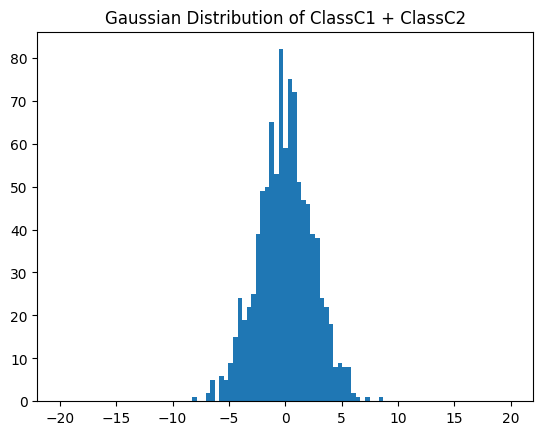

In [ ]:
# 3.2
# plot the histogram of classC1 + classC2
sumC1C2 = Cc1 + Cc2
plt.hist(sumC1C2, bins=bins)
plt.title("Gaussian Distribution of ClassC1 + ClassC2")
refresh()

## 3.2

In [ ]:
3.2
# print/write down the sample
# mean and sample variance, and states what is the distribution of ClassC1 + ClassC2 (in terms
# of true class mean and standard deviation of ClassC1 and ClassC2).
print_mu_var(Cc1, name="Class 1")
print_mu_var(Cc2, name="Class 2")
print_mu_var(sumC1C2, name="Class 1 + Class 2")
# add mu and square root of variance

Class 1 mean -4.008
Class 1 variance 3.80199
Class 1 standard deviation 1.95
Class 2 mean 3.996
Class 2 variance 2.1935
Class 2 standard deviation 1.481
Class 1 + Class 2 mean -0.012
Class 1 + Class 2 variance 5.85008
Class 1 + Class 2 standard deviation 2.419


## 3.3

In [ ]:
# plot the histogram of np.append(ClassC1, ClassC2)
appendC1C2 = np.append(Cc1, Cc2)
plt.hist(appendC1C2, bins=bins)
plt.title("Gaussian Distribution of np.append(ClassC1, ClassC2)")
refresh()

In [ ]:
print_mu_var(Cc1, name="Class 1")
print_mu_var(Cc2, name="Class 2")
print_mu_var(appendC1C2, name="np.append(Class 1, Class 2)")

## 3.4

In [ ]:
# 3.4
# let ClassC = np.append(ClassC1, ClassC2)
CC = np.append(Cc1, Cc2)
# plot the histograms of Class A, B and C
plt.hist(CA, alpha=0.5, bins=bins)
plt.hist(CB, alpha=0.5, bins=bins)
plt.hist(CC, alpha=0.5, bins=bins)
plt.title("Gaussian Distributions of Class A, B and C")

plt.legend(["Class A", "Class B", "Class C"])
refresh()

## 3.5

In [ ]:
# 3.5
# for each class create a set of labels
y_CA = np.full((1000), 1)
y_CB = np.full((500), 2)
y_CC = np.full((2000), 3)

# concatenate labels and class sets together
labels = np.concatenate((y_CA, y_CB, y_CC))
data = np.concatenate((CA, CB, CC))

# generate a random permutation of indexing to perform shuffling for dataset and labels
rand_idx = np.random.permutation(3500)
y = labels[rand_idx]
X = data[rand_idx]

# split the dataset into 60:20:20 ratio for training, validation, testing
def train_val_test_split(s):
  l = len(s)
  return s[0: int(l*0.6)], s[int(l*0.6): int(l*0.6 + l*0.2)], s[int(l*0.8): int(l*0.8 + l*0.2)]
y_train, y_val, y_test = train_val_test_split(y)
X_train, X_val, X_test = train_val_test_split(X)

# print the first 10 elements of the test set and their labels
print("first 10 elements of test set")
print(X_test[0:10])
print("first 10 labels")
print(y_test[0:10])

## 3.6

In [ ]:
# 3.6
# fit a gaussian mixture model to estimate means, std dev, weights of class C on the training set
# two components (C1 & C2) of class C
classC_train = X_train[np.where(y_train == 3)[0]]
# print(classC_train)
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=2, random_state=8)
gmm.fit(classC_train.reshape(-1, 1))

gmm_means_c = gmm.means_.flatten()
gmm_std_c = np.sqrt(gmm.covariances_).flatten()
gmm_weights_c = gmm.weights_.flatten()

# print the estimated parameters
print("Estimated means:", gmm_means_c)
print("Estimated standard deviations:", gmm_std_c)
print("Weights:", gmm_weights_c)

## 3.7

In [ ]:
# parameter estimates for mean and std from datapts for each class
means = [np.mean(CA), np.mean(CB), np.mean(CC)]
std_devs = [np.std(CA), np.std(CB), np.std(CC)]
# print parameter estimates
print(means)
print(std_devs)
print()

# fit a gaussian mixture model to estimate means, std dev, weights of ALL classes A and B and C of the training set
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=2, random_state = 8).fit(X_train[np.where(y_train != 3)[0]].reshape(-1, 1))

gmm_means = [np.flip(gmm.means_.flatten()), gmm_means_c]
gmm_std = [np.flip(np.sqrt(gmm.covariances_).flatten()), gmm_std_c]
gmm_weights = [np.flip(gmm.weights_.flatten()), gmm_weights_c]

# print the estimated parameters
print("Estimated means:", gmm_means)
print("Estimated standard deviations:", gmm_std)
print("Weights:", gmm_weights)
print(gmm_means[1])

In [ ]:
from scipy.stats import norm
from sklearn.metrics import accuracy_score

# gaussian pdf
def norm_pdf(x, mean, std):
  return norm.pdf(x, mean, std)

# implement a ML classifier
def ML_classifier(x):
  likelihoods, likelihoods_gmm = [0, 0, 0], [0, 0, 0]
  for i in range(3):
    if i < 2:
      likelihoods[i] = norm_pdf(x, means[i], std_devs[i])
      likelihoods_gmm[i] = gmm_weights[0][i] * norm_pdf(x, gmm_means[0][i], gmm_std[0][i])
    if i == 2:
      # class C1 and C2 gaussians
      likelihoods_gmm[i] = gmm_weights_c[0] * norm_pdf(x, gmm_means_c[0], gmm_std_c[0]) + gmm_weights_c[1] * norm_pdf(x, gmm_means_c[1], gmm_std_c[1])
  # return the class with the highest probability
  return np.argmax(likelihoods_gmm) + 1

# fit 3 pdfs on the training set
# have the classifier take a list of points, and return the most likely class for each point in the list
y_pred = [ML_classifier(x) for x in X_val]

# calculate validation accuracy
val_accuracy = accuracy_score(y_val, y_pred)

print(f"Validation Accuracy: {val_accuracy}")

## 3.8

In [ ]:
# 3.8
from sklearn.naive_bayes import GaussianNB
# use a Gaussian Naive Bayes classifier and fit using the training set
gnb = GaussianNB()
gnb.fit(X_train.reshape(-1, 1), y_train)
# calculate the validation accuracy
y_pred = gnb.predict(X_val.reshape(-1, 1))

val_accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy (Gaussian Naive-Bayes): {val_accuracy}")

## 3.9

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# create test set confusion matrices for the GNB model and the ML model
test_predictions_ml = [ML_classifier(x) for x in X_test]
test_predictions_gnb = gnb.predict(X_test.reshape(-1, 1))

val_accuracy = accuracy_score(y_test, test_predictions_ml)
print(f"Test Accuracy (ML Classifier): {val_accuracy}")
val_accuracy = accuracy_score(y_test, test_predictions_gnb)
print(f"Test Accuracy (GNB Classifier): {val_accuracy}")

conf_matrix_ml = confusion_matrix(y_test, test_predictions_ml, normalize='true')
conf_matrix_gnb = confusion_matrix(y_test, test_predictions_gnb, normalize='true')

print("Confusion Matrix (Maximum Likelihood Classifier):")
print(conf_matrix_ml)

print("Confusion Matrix (Gaussian Naive Bayes):")
print(conf_matrix_gnb)

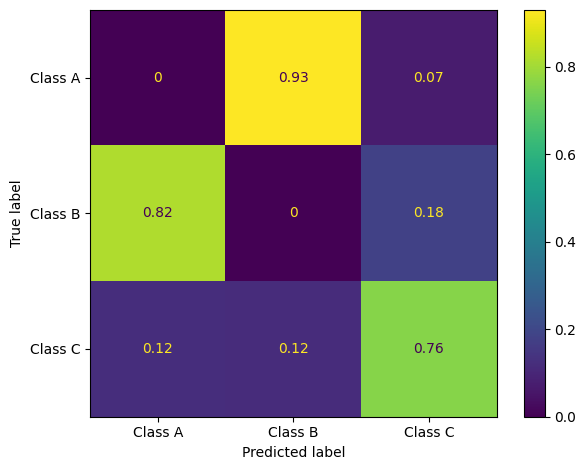

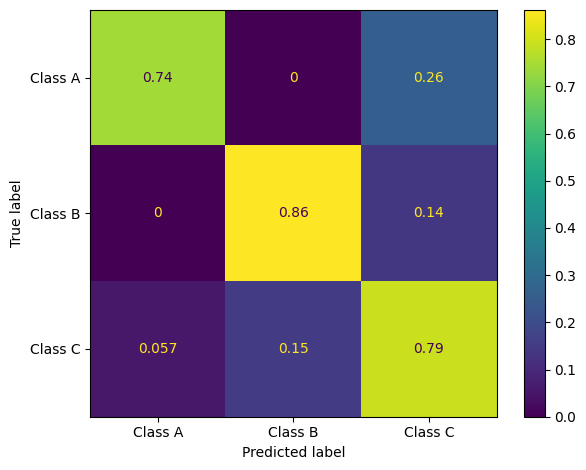

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_ml, display_labels=["Class A", "Class B", "Class C"])
disp.plot()
plt.tight_layout()
refresh()
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gnb, display_labels=["Class A", "Class B", "Class C"])
disp.plot()
plt.tight_layout()
refresh()